In [24]:
import numpy as np #type: ignore
import matplotlib.pyplot as plt # type: ignore
import tensorflow as tf # type: ignore
from tensorflow.keras import layers, models # type: ignore
import os
# data source: https://www.kaggle.com/datasets/jay7080dev/rice-plant-diseases-dataset/data


In [2]:
img_size=256
BATCH_SIZE=32

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("images/rice leaf diseases dataset", shuffle=True,image_size = (img_size,img_size),batch_size=BATCH_SIZE)

Found 4666 files belonging to 3 classes.


In [4]:
classes=dataset.class_names
classes

['Bacterialblight', 'Brownspot', 'Leafsmut']

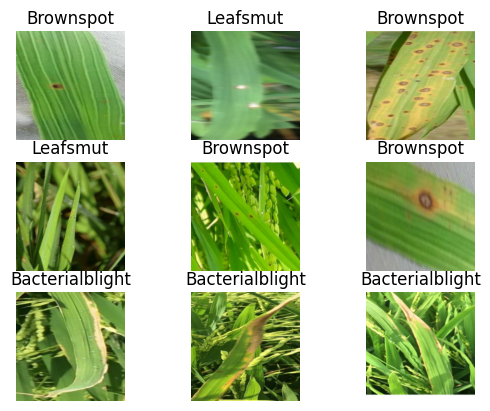

In [5]:
for image_batch, label in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classes[label[i]])
        plt.axis("off")

In [6]:
#for now i do not need that much photos therefore as dataset i will take half of my pictures
len(dataset)

146

In [7]:
datasett = dataset.take(73)

In [8]:
train_ds=datasett.take(53)
val_test_ds= datasett.skip(53)
val_ds = val_test_ds.take(10)
test_ds=val_test_ds.skip(10)

In [9]:
print("train_ds:", str(len(train_ds)))
print("val_ds:", str(len(val_ds)))
print("test_ds:", str(len(test_ds)))

train_ds: 53
val_ds: 10
test_ds: 10


In [10]:
train_ds=train_ds.cache().shuffle(300).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(300).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(300).prefetch(buffer_size = tf.data.AUTOTUNE)

In [11]:

resize = tf.keras.Sequential([
    layers.Resizing(img_size,img_size),
    layers.Rescaling(1.0/255)
])

augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
    
])

In [12]:
cnn = tf.keras.Sequential([
    layers.Resizing(img_size,img_size),
    layers.Rescaling(1.0/255),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.Conv2D(32,(3,3),activation="relu",input_shape = (img_size,img_size,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(len(classes),activation="softmax"),
])



c:\Users\smpop\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
cnn.build(input_shape = (BATCH_SIZE,img_size,img_size,3))
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)           │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_1 (RandomFlip)      │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (32, 256, 256, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 1152)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,699 (725.39 KB)

 Trainable params: 185,699 (725.39 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [15]:
history = cnn.fit(train_ds,epochs=12,batch_size=BATCH_SIZE,validation_data=val_ds, verbose=1)

Epoch 1/12
53/53 ━━━━━━━━━━━━━━━━━━━━ 42s 751ms/step - accuracy: 0.3888 - loss: 1.0614 - val_accuracy: 0.6156 - val_loss: 0.8430
Epoch 2/12
53/53 ━━━━━━━━━━━━━━━━━━━━ 38s 726ms/step - accuracy: 0.6521 - loss: 0.7473 - val_accuracy: 0.7375 - val_loss: 0.6778
Epoch 3/12
53/53 ━━━━━━━━━━━━━━━━━━━━ 36s 689ms/step - accuracy: 0.7260 - loss: 0.6645 - val_accuracy: 0.8031 - val_loss: 0.5831
Epoch 4/12
53/53 ━━━━━━━━━━━━━━━━━━━━ 36s 675ms/step - accuracy: 0.7795 - loss: 0.5868 - val_accuracy: 0.8188 - val_loss: 0.5356
Epoch 5/12
53/53 ━━━━━━━━━━━━━━━━━━━━ 36s 672ms/step - accuracy: 0.8172 - loss: 0.5049 - val_accuracy: 0.7531 - val_loss: 0.5805
Epoch 6/12
53/53 ━━━━━━━━━━━━━━━━━━━━ 38s 712ms/step - accuracy: 0.8187 - loss: 0.4659 - val_accuracy: 0.8156 - val_loss: 0.4436
Epoch 7/12
53/53 ━━━━━━━━━━━━━━━━━━━━ 36s 682ms/step - accuracy: 0.8581 - loss: 0.3552 - val_accuracy: 0.8531 - val_loss: 0.3854
Epoch 8/12
53/53 ━━━━━━━━━━━━━━━━━━━━ 36s 673ms/step - accuracy: 0.8464 - loss: 0.3598 - val_accu

In [16]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

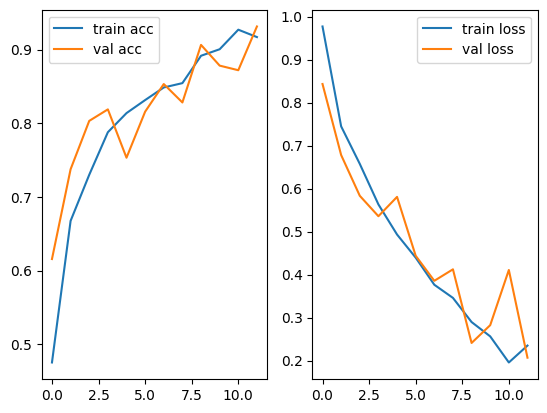

In [18]:
plt.subplot(1,2,1)
plt.plot(range(12),acc,label="train acc")
plt.plot(range(12),val_acc,label="val acc")
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(12),loss,label="train loss")
plt.plot(range(12),val_loss,label="val loss")
plt.legend(loc="upper right")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


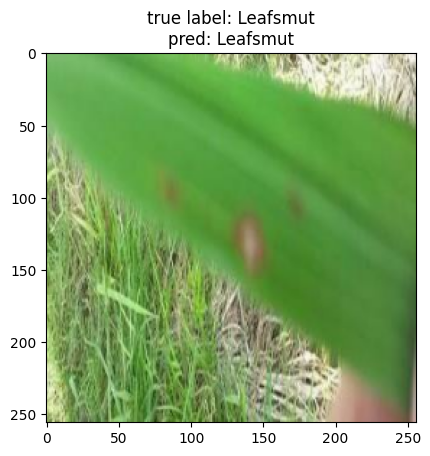

In [ ]:
for im_batch, label in test_ds.take(1):
    image=im_batch[0].numpy().astype("uint8")
    label1 = label[0]
    predictions=cnn.predict(im_batch)
    plt.imshow(image)
    plt.title("true label: "+classes[label1]+"\n"+"pred: "+classes[np.argmax(predictions[0])])
    plt.axis("off")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


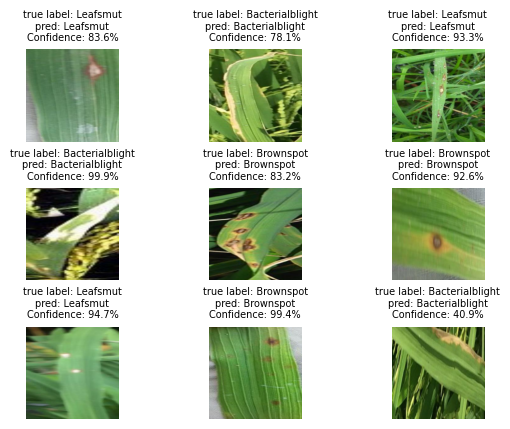

In [ ]:
for im_batch, label in test_ds.take(1):
    predictions=cnn.predict(im_batch)
    plt.subplots_adjust(hspace=0.5, wspace=0.4)
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        image=im_batch[i].numpy().astype("uint8")
        label1 = label[i]
        plt.imshow(image)
        plt.title("true label: "+classes[label1]+"\n"+"pred: "\
            +classes[np.argmax(predictions[i])]+"\n"\
                +"Confidence: {:.1f}%".format(np.max(predictions[i])*100), fontsize = 7)
        plt.axis("off")


In [20]:
save_dir = "images/model_rdy/first_model"
os.makedirs(save_dir, exist_ok=True)

In [21]:
cnn.save("images/model_rdy/first_model.keras")

In [22]:
#testing if it's all right
cnn2=tf.keras.models.load_model("images/model_rdy/first_model.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


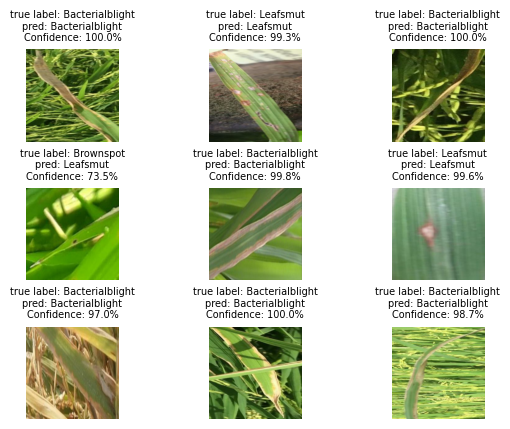

In [23]:
for im_batch, label in test_ds.take(1):
    predictions=cnn2.predict(im_batch)
    plt.subplots_adjust(hspace=0.5, wspace=0.4)
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        image=im_batch[i].numpy().astype("uint8")
        label1 = label[i]
        plt.imshow(image)
        plt.title("true label: "+classes[label1]+"\n"+"pred: "\
            +classes[np.argmax(predictions[i])]+"\n"\
                +"Confidence: {:.1f}%".format(np.max(predictions[i])*100), fontsize = 7)
        plt.axis("off")